![Astrofisica Computacional](../../logo.PNG)

---
## 01. A Perceptron


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will implement a perceptron algorithm, which incorporates the idea of a linear regression and a activation function to define a classification method.

---

## A Simple Perceptron Algorithm

Introduced by F. Rosenblatt in 1957, a perceptron algorithm tries to model the behavior of a single (artificial) neuron. This algorithm will be modelled as a function that recieves input data, the it wights them and adds a term to present the result through a non-linear function. It will correspond to an algorithm of supervised learning (binary classification).

The general behavior and components can be seen in the following figure:


<center>
<img
src="https://datascientest.com/wp-content/uploads/2021/03/perceptron-formule.png"
>
</center>



Now we will build a perceptron from scratch. The first step is to define the function that reads the input data, weigths and bias and returns the result of the linear model.

As a first model, we will consider a perceptron with one input: $x_1$, one weight: $w_1$ and one bias: $b$ and gives one return: z = $w_1 x_1 + b$.

In [1]:
import numpy as np

def perceptron01(x):
    w = -2.
    bias = 2.
    return np.dot(w,x) + bias


x0 = 10.

perceptron01(x0)

-18.0

We can apply this perceptron to many samples to obtain the corresponding results,

In [2]:
x = np.array([-5., 10, 3.2, 2.8, -4.3])

ypred = perceptron01(x)
ypred

array([ 12. , -18. ,  -4.4,  -3.6,  10.6])

In order to present the results, we can use the library `pandas`,

In [3]:
import pandas as pd

df = pd.DataFrame(x, columns=['x1'])
df['yp'] = ypred

df

,x1,yp
0,-5.0,12.0
1,10.0,-18.0
2,3.2,-4.4
3,2.8,-3.6
4,-4.3,10.6


This perceptron is just a linear function with a slope $w_1$ and an intercept $b$ defined in the construction. 

---

## A Learning Perceptron

The main characteristic we want to give to the perceptron is that it can 'learn' by itself, i.e. based on a dataset with inputs and targets, the perceptron must be able to redefine its weigths and bias. In order to illustrate this idea, we introduce a dataset of temperatures in Celsius and the targets will be the corresponding temperatures in the Fahrenheit scale,

In [4]:
X = np.array([-40., -30., -10., -5., 0., 8., 15., 22., 38., 50.]) # Input data
y = np.array([-40. , -22. ,  14. ,  23. ,  32. ,  46.4,  59. ,  71.6, 100.4,
       122. ]) #Targets


df = pd.DataFrame(X, columns=['ºC'])
df['ºF'] = y

df

,ºC,ºF
0,-40.0,-40.0
1,-30.0,-22.0
2,-10.0,14.0
3,-5.0,23.0
4,0.0,32.0
5,8.0,46.4
6,15.0,59.0
7,22.0,71.6
8,38.0,100.4
9,50.0,122.0


We define a new perceptron class with random generated weigths and bias and we will apply it to a dataset to compare the results with the known targets,

In [5]:
class perceptron02:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
        
    def predict(self,x):
        return np.dot(self.w,x) + self.bias



p = perceptron02()
yp = p.predict(X)

df = pd.DataFrame(X, columns=['x'])
df['y'] = y
df['yp'] = yp

df

,x,y,yp
0,-40.0,-40.0,-258.863401
1,-30.0,-22.0,-193.184946
2,-10.0,14.0,-61.828036
3,-5.0,23.0,-28.988809
4,0.0,32.0,3.850419
5,8.0,46.4,56.393183
6,15.0,59.0,102.368101
7,22.0,71.6,148.343020
8,38.0,100.4,253.428548
9,50.0,122.0,332.242694


In [6]:
p.w, p.bias

(6.567845494347568, 3.8504189530429844)

Note that the predicted values do not reproduce the targets. We will introduce, inside the perceptron class, a 'cost function' that evaluates the precision of the perceptron to reproduce the targets from the input information,

\begin{equation}
f_C (y^p, y) = \sum _i (y^p_i - y_i)^2 = \sum_i (wx_i +b - y_i)^2
\end{equation}

In [7]:
class perceptron02:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
        
    def predict(self,x):
        return np.dot(self.w, x) + self.bias
    
    def fC(self, x, y):
        yp = self.predict(x)
        return sum((yp - y)**2)


p = perceptron02()
yp = p.predict(X)
cost = p.fC(X,y)

print('cost = ', cost)


cost =  161940.47375841023


Note that the large value of the cost function indicates a big difference between predictions and targets. The idea introducing this function is that we will improve the parameters of the perceptron by minimizing $f_C$. Hence we will introduce the derivatives

\begin{align}
\frac{\partial f_C}{\partial w} = &\sum_i 2(wx_i +b - y_i)x_i \\
\frac{\partial f_C}{\partial b} = &\sum_i 2(wx_i +b - y_i)
\end{align}


In [8]:
class perceptron02:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
        
    def predict(self, x):
        return np.dot(self.w, x) + self.bias
    
    def fC(self,x,y):
        yp = self.predict(x)
        return sum((yp - y)**2)
    
    def grad_fC(self,x,y):
        yp = self.predict(x)
        return [sum(2*(yp - y)*x), sum(2*(yp - y))]


p = perceptron02()
yp = p.predict(X)
cost = p.fC(X,y)
grad_fC = p.grad_fC(X,y)

print('cost = ', cost)
print('dfC/dw =', grad_fC[0])
print('dfC/db =', grad_fC[1])


cost =  161940.47375841023
dfC/dw = 67308.68345849183
dfC/db = -105.27845348177357


The components of the gradient permit to modify the weigths and bias,

\begin{align}
w = &w - \alpha \frac{\partial f_C}{\partial w}  \\
b = &b - \alpha \frac{\partial f_C}{\partial b} 
\end{align}

where the parameters are modified by adding the gradient descent (negative of the gradient) multiplied by a small factor called 'Learning Rate'. 

We introduce in the perceptron class a function to optimize the parameters,

In [9]:
class perceptron02:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
        
    def predict(self, x):
        return np.dot(self.w, x) + self.bias
    
    def fC(self):
        return sum((self.yp - self.y)**2)
    
    def grad_fC(self):
        return [sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))]
    
    def improve(self,x,y):
        alpha = 1e-4 # Learning Rate
        self.x = x
        self.y = y
        self.yp = self.predict(x)
        cost_before = self.fC()
        self.w -= alpha*self.grad_fC()[0]
        self.bias -= alpha*self.grad_fC()[1]
        self.yp = self.predict(x)
        cost_after = self.fC()
        return cost_before, cost_after


p = perceptron02()

cost_i, cost_f = p.improve(X,y)
print('initial cost = ', cost_i)
print('final cost = ', cost_f)


initial cost =  161940.47375841023
final cost =  41512.96706777971


In [10]:
p.w, p.bias

(-0.16302285150161477, 3.860946798391162)

With this idea in mind, we can improve the parameters by calling multiple times the improve method,

In [11]:
p = perceptron02()
cost_i, cost_f = p.improve(X,y)
print('initial cost = ', cost_i)

for i in range(10):
    cost_i, cost_f = p.improve(X,y)
    print(f'cost in step {i:.0f}= ', cost_f)


initial cost =  161940.47375841023
cost in step 0=  15061.13265527326
cost in step 1=  9233.047940160108
cost in step 2=  7931.087630098235
cost in step 3=  7622.507787775035
cost in step 4=  7532.021138569387
cost in step 5=  7489.484781675668
cost in step 6=  7457.559251049177
cost in step 7=  7428.049783414183
cost in step 8=  7399.157638588673
cost in step 9=  7370.487732537224


We will modify the percepton class to include a parameter with the information about how many 'epochs', i.e. repetitions, will be performed.

In [12]:
class perceptron:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
        
    def predict(self, x):
        return np.dot(self.w, x) + self.bias
    
    def fC(self):
        self.yp = self.predict(self.x)
        return sum((self.yp - self.y)**2)
    
    def grad_fC(self):
        self.yp = self.predict(self.x)
        return [sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))]
 
    def improve(self):
        alpha = 1e-4 # Learning Rate
        self.w -= alpha*self.grad_fC()[0]
        self.bias -= alpha*self.grad_fC()[1]
        
    def train(self, x, y, epochs):
        self.x = x
        self.y = y
        self.yp = self.predict(self.x) # Initial prediction
        history = np.zeros(epochs)
        for i in range(epochs):
            history[i] = self.fC()
            self.improve()
        return history

    
p = perceptron()
epochs = 50
history = p.train(X, y, epochs)
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])

initial cost =  161940.47375841023
final cost after 50 epochs =  6340.608197206991


In [13]:
yp = p.predict(X)

df = pd.DataFrame(X, columns=['ºC'])
df['ºF'] = y
df['yp'] = yp

df

,ºC,ºF,yp
0,-40.0,-40.0,-72.222269
1,-30.0,-22.0,-52.550613
2,-10.0,14.0,-13.207300
3,-5.0,23.0,-3.371472
4,0.0,32.0,6.464356
5,8.0,46.4,22.201681
6,15.0,59.0,35.971841
7,22.0,71.6,49.742000
8,38.0,100.4,81.216651
9,50.0,122.0,104.822638


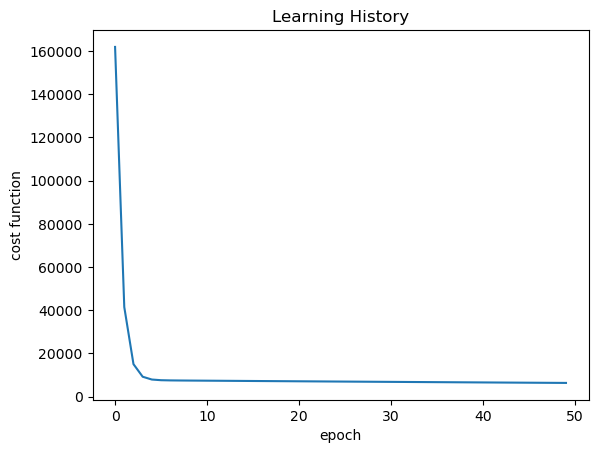

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.title('Learning History')
plt.show()

Increasing the number of epochs, the perceptron will modify its parameters to optimize the output:

In [15]:
p = perceptron()
epochs = 7000
history = p.train(X, y, epochs)
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])


initial cost =  161940.47375841023
final cost after 7000 epochs =  1.2475080095100452e-08


The final outputs are equal to the original known targets,

In [16]:
yp = p.predict(X)

df = pd.DataFrame(X, columns=['ºC'])
df['ºF'] = y
df['yp'] = yp

df

,ºC,ºF,yp
0,-40.0,-40.0,-40.000045
1,-30.0,-22.0,-22.000043
2,-10.0,14.0,13.999962
3,-5.0,23.0,22.999963
4,0.0,32.0,31.999964
5,8.0,46.4,46.399966
6,15.0,59.0,58.999968
7,22.0,71.6,71.599969
8,38.0,100.4,100.399973
9,50.0,122.0,121.999976


The trained perceptron has the parameters

In [17]:
print('w = ', p.w)
print('b = ', p.bias)

w =  1.8000002344786092
b =  31.99996418186047


Since $\frac{9}{5} = 1.8$, we conclude that the trained perceptron equation

\begin{equation}
y_p = wx+b = 1.8x + 32 
\end{equation}

shows that the algorithm 'learned' by itself the well known relation between Celcius and Fahrenheit temperatures,

\begin{equation}
ºF = \frac{9}{5} ºC + 32 
\end{equation}

---
## A classification Perceptron with multiple inputs

Now we will return to a simple perceptron including two inputs: $x_1$ and $x_2$, two weights: $w_1$ and $w_0$ and one bias: $b$ and giving one return: z = $w_1 x_1 + w_2 x_2 + b$.

In [18]:
import numpy as np

class perceptronC:
    def __init__(self):
        self.w = np.array([-2., 5.])
        self.bias = 2.
        
    def predict(self,x):
        self.x = x
        return np.dot(self.w,self.x) + self.bias

    
x = np.array([0., 1.])

p = perceptronC()
p.predict(x)

7.0

In order to transform this perceptron into a classifier, we will incorporate an 'activation function'. For example, we may consider a step function,

\begin{equation}
f_A(z) = \begin{cases}
0 \text{ if } z\leq 0 \\
1 \text{ if } z> 0
\end{cases}
\end{equation}

which classifies the outputs into two possibilities: 0 and 1.

In [19]:
class perceptronC:
    def __init__(self):
        self.w = np.array([-2., 5.])
        self.bias = 2.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1

        
x = np.array([2., 5.])
p = perceptronC()
p.predict(x)

1

In [20]:
x = np.array([5., 1.])
perceptronC().predict(x)

0

Now we can apply this perceptron to many input data,

In [21]:
data = np.array([[0., 1.],
                [5., 1.],
                [3., 4.],
                [10., 3.5],
                [6., 4.],
                [4., 2.]])

yp = np.zeros(len(data))

p = perceptronC()

for i in range(len(data)):
    yp[i] = p.predict(data[i])

and we can show the results as a table,

In [22]:
df = pd.DataFrame(data, columns=['x1','x2'])
df['yp'] = yp

df

,x1,x2,yp
0,0.0,1.0,1.0
1,5.0,1.0,0.0
2,3.0,4.0,1.0
3,10.0,3.5,0.0
4,6.0,4.0,1.0
5,4.0,2.0,1.0


---

Lets define a perceptron with the following values:

- $w_1 = -2$
- $w_2 = -2$
- $b = 3$

Hence the result of the linear function is $z = -2 x_1 -2 x_2 +3$. In a plane with axes $(x_1,x_2)$ we have the following straight line:


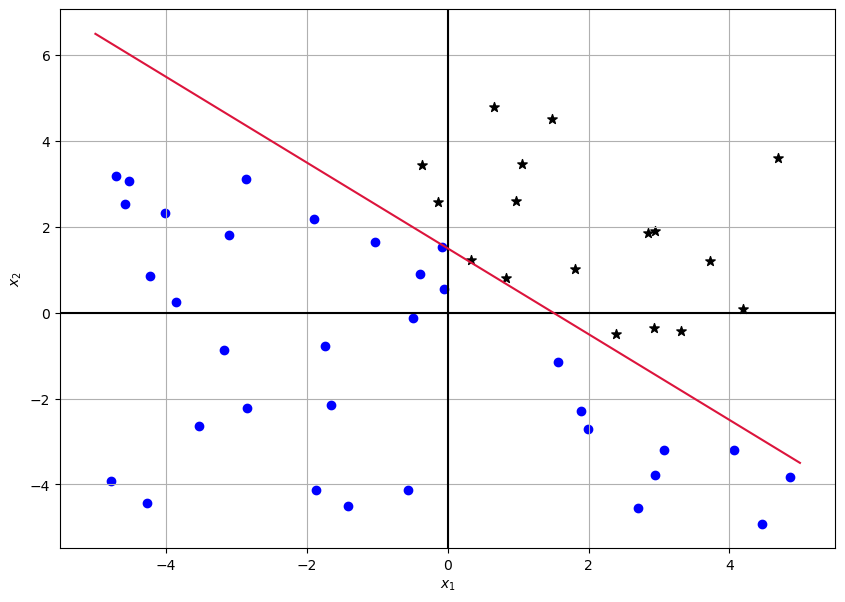

In [23]:
import matplotlib.pyplot as plt

class perceptronC:
    def __init__(self):
        self.w = np.array([-2., -2.])
        self.bias = 3.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1


p = perceptronC()

x1 = np.arange(-5,6)
np.random.seed(413)
points = -5 + np.random.rand(50,2)*10

def sl(x1):
    '''
    Straight line equation
    '''
    return -x1 + 3/2 



plt.figure(figsize=(10,7))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x1, sl(x1), color='crimson')
for i in range(len(points)):
    if points[i,1]>sl(points[i,0]):
        plt.scatter(points[i,0], points[i,1], marker='*', color='black', s=50)
    else:
        plt.scatter(points[i,0], points[i,1], marker='o', color='blue')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid()
plt.show()

In this plot is easy to show the result of the applying the activation function. Any point above the straight line (black stars) corresponds to a final result of $1$ while any point below the straight line (blue dots) corresponds to a final result of 0 in the binary classifier.

## NAND Logic Gate

Consider a particular case in which the inputs ($x_1$ and $x_2$) are binary values (i.e. $0$ or $1$). The allowed points in the $(x_1,x_2)$ plane are represented as

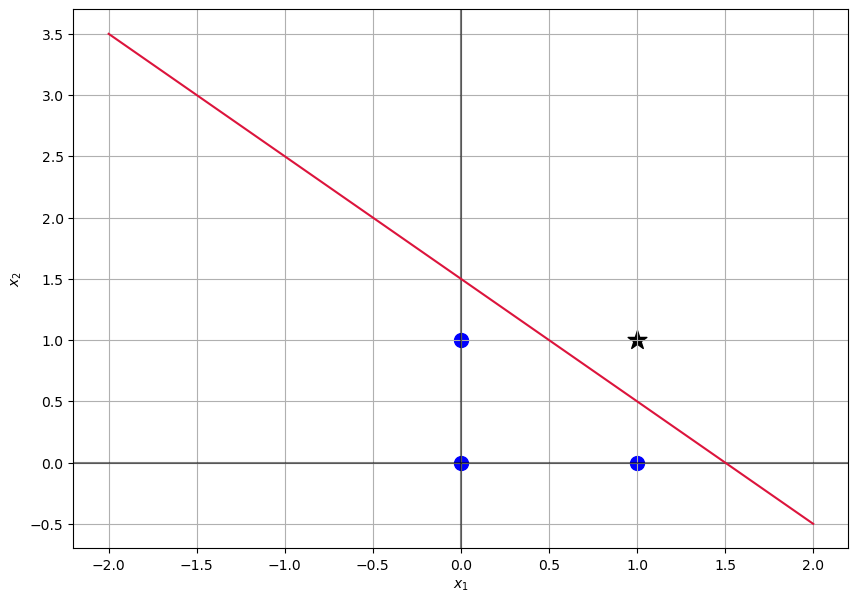

In [24]:
x1 = np.arange(-2,3)


def sl(x1):
    return -x1 + 3/2 

points = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])


plt.figure(figsize=(10,7))
plt.axhline(0, color='black', alpha=0.5)
plt.axvline(0, color='black', alpha=0.5)
plt.plot(x1, sl(x1), color='crimson')
for i in range(len(points)):
    if points[i,1]>sl(points[i,0]):
        plt.scatter(points[i,0], points[i,1], marker='*', color='black', s=200)
    else:
        plt.scatter(points[i,0], points[i,1], marker='o', color='blue', s=100)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid()
plt.show()

This plot shows immediately the results of applying the perceptron to these datapoints,

In [25]:

class perceptronC:
    def __init__(self):
        self.w = np.array([-2., -2.])
        self.bias = 3.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1


p = perceptronC()


points = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

yp = np.zeros(len(points))

for i in range(len(points)):
    yp[i] = p.predict(points[i])
    
df = pd.DataFrame(points, columns=['x1','x2'])
df['yp'] = yp

df    

,x1,x2,yp
0,0,0,1.0
1,0,1,1.0
2,1,0,1.0
3,1,1,0.0


These results shows that this particualr perceptron reproduces the result of a NAND GATE !!

We can define the NAND Gate perceptron in a compact form as 

In [26]:
class NAND:
    def __init__(self):
        self.w = np.array([-2., -2.])
        self.bias = 3.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1


p = NAND()


    
points = np.array([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,0]])
    
for i in range(len(points)):
    points[i,2] = p.predict([points[i,0],points[i,1]])
    
df = pd.DataFrame(points, columns=['x1','x2','y'])

df  

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0




**Since all logical gates can be obtained using only NAND gates, we can use perceptrons to implement a model of any digital circuit!!**

<img src="https://www.electronics-tutorials.ws/wp-content/uploads/2019/09/log80.gif" >


Now we can easily implement an OR GATE:

In [27]:
def ORGate(x1,x2):
    p = NAND()
    y1 = p.predict([x1,x1])
    y2 = p.predict([x2,x2])
    z = p.predict([y1,y2])
    return z

points = np.array([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,0]])
    
for i in range(len(points)):
    points[i,2] = ORGate(points[i,0],points[i,1])
    
df = pd.DataFrame(points, columns=['x1','x2','y'])

df  

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1
